In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from routines import Data_reduction
cmap = matplotlib.colormaps.get('tab10').colors
cmap_grad = matplotlib.colormaps.get('viridis')
from corrections import *
plt.style.use('fullwidth.mplstyle')
from scipy.optimize import curve_fit

#### Vorbereitung: Zeitintensive Datenreduktion und Mittelung der Mean-PMT-Pulse für kombinierte Datensets durchführen und Ergebnisse speichern.

In [2]:
n_data = 10000
# Data reduction is only done again if data in reduced/dir is deleted
Data_reduction('D:/air_10x10', number_data=n_data).data_reduction()
Data_reduction('D:/air_10x40', number_data=n_data).data_reduction()
Data_reduction('D:/air_40x40', number_data=n_data).data_reduction()
Data_reduction('D:/lmr_10x10', number_data=n_data).data_reduction()
Data_reduction('D:/lmr_40x10', number_data=n_data).data_reduction()

# Pulse von kombinierten Daten mitteln

# Airborne 5x10
data_1 = Data_reduction('D:/20240711_10x10')
data_2 = Data_reduction('D:/20240809_10x10_2')
ch0_1, ch1_1 = data_1._return_mean_pulseshapes()
ch0_1 *= data_1._n_data
ch1_1 *= data_1._n_data
ch0_2, ch1_2 = data_2._return_mean_pulseshapes()
ch0_2 *= data_2._n_data
ch1_2 *= data_2._n_data
ch0 = (ch0_1 + ch0_2)/(data_1._n_data + data_2._n_data)
ch1 = (ch1_1 + ch1_2)/(data_1._n_data + data_2._n_data)
np.savetxt('D:/air_10x10/ch0/calib.shape1', ch0)
np.savetxt('D:/air_10x10/ch1/calib.shape1', ch1)
# Airborne 40x40
data_1 = Data_reduction('D:/20240710_40x40')
data_2 = Data_reduction('D:/20240716_40x40')
ch0_1, ch1_1 = data_1._return_mean_pulseshapes()
ch0_1 *= data_1._n_data
ch1_1 *= data_1._n_data
ch0_2, ch1_2 = data_2._return_mean_pulseshapes()
ch0_2 *= data_2._n_data
ch1_2 *= data_2._n_data
ch0 = (ch0_1 + ch0_2)/(data_1._n_data + data_2._n_data)
ch1 = (ch1_1 + ch1_2)/(data_1._n_data + data_2._n_data)
np.savetxt('D:/air_40x40/ch0/calib.shape1', ch0)
np.savetxt('D:/air_40x40/ch1/calib.shape1', ch1)
# LMR 10x10
data_1 = Data_reduction('D:/20240807_10x10_thick')
data_2 = Data_reduction('D:/20240808_10x01_thick')
ch0_1, ch1_1 = data_1._return_mean_pulseshapes()
ch0_1 *= data_1._n_data
ch1_1 *= data_1._n_data
ch0_2, ch1_2 = data_2._return_mean_pulseshapes()
ch0_2 *= data_2._n_data
ch1_2 *= data_2._n_data
ch0 = (ch0_1 + ch0_2)/(data_1._n_data + data_2._n_data)
ch1 = (ch1_1 + ch1_2)/(data_1._n_data + data_2._n_data)
np.savetxt('D:/lmr_10x10/ch0/calib.shape1', ch0)
np.savetxt('D:/lmr_10x10/ch1/calib.shape1', ch1)

#### LF Offset

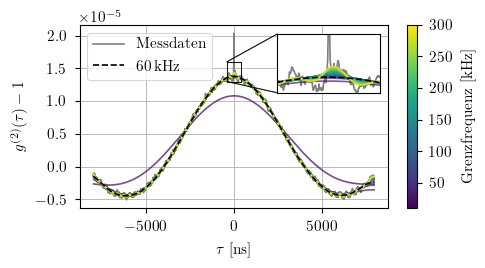

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
data = Data_reduction('D:/air_40x40', number_data=10000)
data.data_reduction()
g2, t = data.av_g2, data.time_arr

vmin, vmax = 10, 300
cutoffs = np.linspace(vmin, vmax,20)*1e-5

patterns = []
for cutoff in cutoffs:
    lf_pattern = lowpass(g2, cutoff)
    patterns.append(lf_pattern)

fig,ax = plt.subplots()
ax.plot(t*1e9,g2-1,'grey', label='Messdaten')
for i,pattern in enumerate(patterns):
    ax.plot(t*1e9,pattern-1, color=cmap_grad(i/len(cutoffs)), alpha=0.7)
ax.plot(t*1e9,lowpass(g2, 60e-5)-1, 'k--', label='60$\,$kHz')

sm = plt.cm.ScalarMappable(cmap=cmap_grad, norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm, ax=ax, label='Grenzfrequenz [kHz]')
axin = ax.inset_axes([0.64,0.63, 0.335,0.32],xlim=(-400,400), ylim=(1.3e-5,1.6e-5), xticklabels=[], yticklabels=[], xticks=[], yticks=[])
# necessary style stuff
ax.indicate_inset_zoom(axin, edgecolor='k')
axin.spines[['top','right','bottom','left']].set_color('k')
box, cs = ax.indicate_inset_zoom(axin)
box.set_linewidth(0.6)
box.set_edgecolor("k")
box.set_facecolor("none")
box.set_alpha(1)
for c in cs:
    c.set_linewidth(0.6)
    c.set_color("k") 
    c.set_alpha(1)
# ----------------------
axin.plot(t*1e9,g2-1, color='grey')
for i,pattern in enumerate(patterns):
    axin.plot(t*1e9,pattern-1, color=cmap_grad(i/len(cutoffs)), alpha=0.7)
axin.plot(t*1e9,lowpass(g2, 60e-5)-1, 'k--', label='60$\,$kHz')
ax.legend()
ax.set(xlabel='$\\tau$ [ns]', ylabel='$g^{(2)}(\\tau) -1$')
ax.ticklabel_format(useOffset=False)
ax.grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/lf_offset.pdf', bbox_inches='tight')

#### Plot for shwoing lf offset subtraction

c:\Users\steph\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


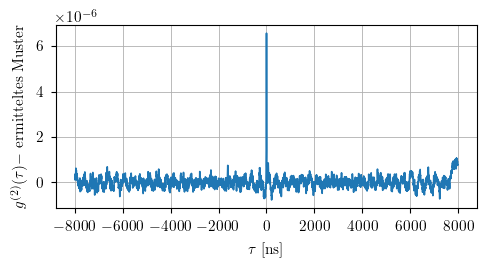

In [4]:
data = Data_reduction('D:/air_40x40', number_data=10000)
data.data_reduction()
infodict = data.integrate(return_infodict=True)
g2, t = data.av_g2, data.time_arr
pattern = infodict['lf_pattern']
fig,ax = plt.subplots()
ax.plot(t*1e9,g2-pattern)
ax.set(xlabel='$\\tau$ [ns]', ylabel='$g^{(2)}(\\tau)-$ ermitteltes Muster')
ax.grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/g2-lf_offset.pdf', bbox_inches='tight')

#### Show Gauss Fit

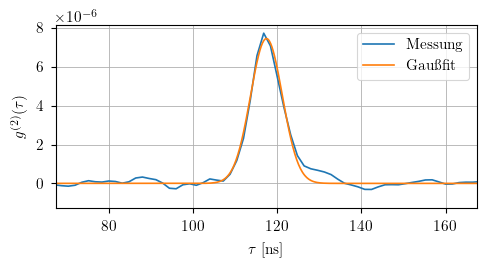

In [5]:
data = Data_reduction('D:/air_10x40', number_data=10000)
data.data_reduction()
infodict = data.integrate(return_infodict=True)
pattern = infodict['lf_pattern']
t, g2 = data.time_arr, data.av_g2 -pattern

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))
popt, _ = curve_fit(gauss, t, g2, p0=[1e-5,0,1e-6])
fig,ax = plt.subplots()
ax.plot(t*1e9,g2, label='Messung')
ax.plot(np.linspace(50,200,1000), gauss(np.linspace(50,200,1000)*1e-9, *popt), label='Gaußfit')
ax.set(xlabel='$\\tau$ [ns]', ylabel='$g^{(2)}(\\tau)$', xlim=[popt[1]*1e9-50,popt[1]*1e9+50])
ax.legend()
ax.grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/g2_gaussfit.pdf', bbox_inches='tight')

#### Mean Pulsehapes, Korrelation+Interpolation, Korrelation für versch. sigma

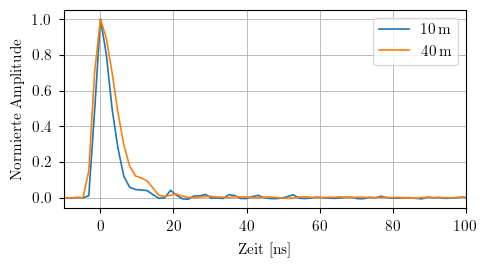

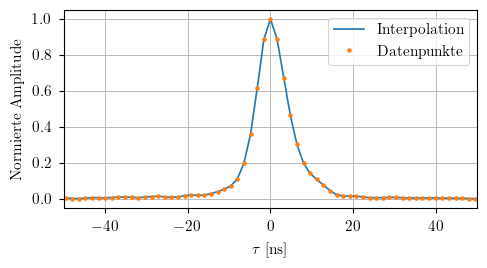

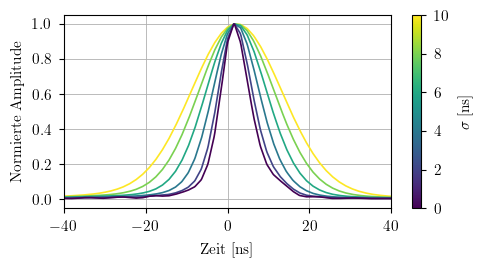

In [6]:
# TODO: Herausfinden ob das tatsächlich bins sind
data = Data_reduction('D:/air_10x40', number_data=10000)
data.data_reduction()
ch0, ch1 = data._return_mean_pulseshapes()
fig,ax = plt.subplots()
ax.plot(ch0[:,0]*1.6, ch0[:,1], color=cmap[0], label='10$\,$m')
ax.plot(ch1[:,0]*1.6, ch1[:,1], color=cmap[1], label='40$\,$m')
ax.set(xlabel='Zeit [ns]', ylabel='Normierte Amplitude',xlim=[-10,100])
ax.legend()
ax.grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/mean_pulseshapes.pdf', bbox_inches='tight')

pulse = scipy.signal.correlate(ch1[:,1], ch0[:,1], mode='same')
pulse= pulse/np.max(pulse) 
x = np.arange(0,211)*1.6e-9
x = x - x[np.argmax(pulse)]
# Interpolation:
corr_func = scipy.interpolate.interp1d(x, pulse, fill_value=0.0, kind='linear', bounds_error=False)
fig,ax = plt.subplots()
ax.plot(np.linspace(-100,100,1000), corr_func(np.linspace(-100,100,1000)*1e-9), label='Interpolation')
ax.plot(x*1e9, pulse, '.', label='Datenpunkte')
ax.set(xlabel='$\\tau$ [ns]', ylabel='Normierte Amplitude', xlim=[-50,50])
ax.grid()
ax.legend()
fig.tight_layout()
fig.savefig('latex/images/Analysis/interpolation.pdf', bbox_inches='tight')

data._set_correlated_pulse_function()
fit_func = data._fit_func
fig,ax = plt.subplots()
for i in np.linspace(10,0.001,6):
    ax.plot(np.linspace(-100,100,1000), fit_func(np.linspace(-100,100,1000)*1e-9, 1,0,i*1e-9), color=cmap_grad(i/10))
ax.set(xlabel='Zeit [ns]', ylabel='Normierte Amplitude', xlim=[-40,40])
ax.grid()
sm = plt.cm.ScalarMappable(cmap=cmap_grad, norm=plt.Normalize(vmin=0, vmax=10))
fig.colorbar(sm, ax=ax, label='$\sigma\;$[ns]')
fig.tight_layout()
#fig.savefig('latex/images/Analysis/corr_pulses_diff_sigma.pdf', bbox_inches='tight')

#### Different Integration widths

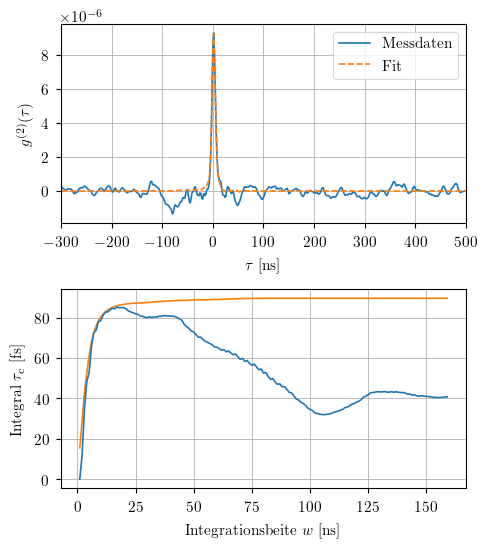

In [24]:
data = Data_reduction('D:/air_10x10', number_data=10000)
data.data_reduction()
infodict = data.integrate(return_infodict=True)
pattern = infodict['lf_pattern']
t, g2 = data.time_arr, data.av_g2-pattern
fit_func = data._fit_func
fit_params = infodict['fit_params']
fig,ax = plt.subplots(nrows=2, figsize=(5,5.62))
ax[0].plot(t*1e9, g2, color=cmap[0], label='Messdaten')
ax[0].plot(np.linspace(-500,500,5000), fit_func(np.linspace(-500,500,5000)*1e-9, *fit_params), '--', color=cmap[1], label='Fit')
ax[0].set(xlabel='$\\tau$ [ns]', ylabel='$g^{(2)}(\\tau)$', xlim=[-300,500])
integrals, raw_integrals = [], []
ax[0].grid()
ax[0].legend()
widths = np.arange(1,160,1)*1e-9
for width in widths:
    int_window = np.arange(fit_params[1]-width, fit_params[1]+width, 0.1e-9)
    integral = np.trapz(fit_func(int_window, *fit_params), dx=0.1e-9)
    raw_integral = np.trapz(g2[(t>=np.min(int_window))&(t<np.max(int_window))], dx=1.6e-9)
    integrals.append(integral)
    raw_integrals.append(raw_integral)
ax[1].plot(widths*1e9, np.array(integrals)*1e15,color=cmap[1])
ax[1].plot(widths*1e9, np.array(raw_integrals)*1e15, color=cmap[0])
ax[1].set(xlabel='Integrationsbeite $w$ [ns]', ylabel='Integral $\\tau_{\mathrm{c}}$ [fs]')
ax[1].grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/integration_different_width.pdf', bbox_inches='tight')

#### Integrationsplots

c:\Users\steph\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Peak Position: lmr_10x10 -3.816861168905809e-10
Peak Position: lmr_40x10 1.1340079561870554e-07
Peak Position: air_10x10 -4.2596718496479587e-10
Peak Position: air_10x40 1.1551401696914917e-07
Peak Position: air_40x40 -3.531310762599608e-10
Integrale Air:
 [[8.97637342e-14 3.24855239e-15]
 [8.14767989e-14 3.14060735e-15]
 [8.05569997e-14 4.04789826e-15]]
Integrale LMR:
 [[9.20922647e-14 3.15284779e-15]
 [8.73726020e-14 3.51112715e-15]]
Integral 10x10/10x40: (1.101709141335399, 0.0582502600616702) 
Integral 10x10/40x40: (1.114288448239004, 0.06900196822255104)


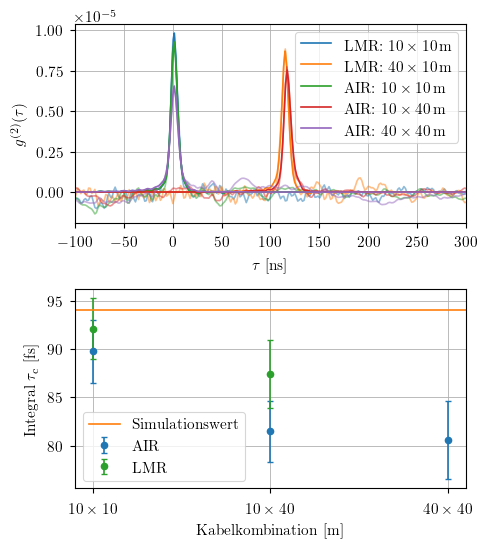

In [21]:
# function to get ratio of two values and its error
def get_ratio_with_error(ch1, ch2):
    # Each channel is a tuple of (value, error)
    ratio = ch1[0]/ch2[0]
    error = np.sqrt((ch1[1]/ch2[0])**2 + (ch1[0]*ch2[1]/(ch2[0]**2))**2)
    return ratio, error

fig,ax = plt.subplots(nrows=2, figsize=(5,5.62))
integrals_air = []
integrals_lmr = []
sigmas = []
for i,d in enumerate(['lmr_10x10', 'lmr_40x10', 'air_10x10', 'air_10x40', 'air_40x40']):
    path = 'D:/'+d
    data = Data_reduction(path, number_data=10000)
    data.data_reduction()
    if d=='lmr_40x10':
        data.av_g2 = np.flip(data.av_g2)
    infodict = data.integrate(return_infodict=True)
    t, g2 = data.time_arr, data.av_g2_corr
    x_fit = np.linspace(-500,500,5000)
    ax[0].plot(t*1e9, g2, color=cmap[i], alpha=0.5)
    ax[0].plot(x_fit, data._fit_func(x_fit*1e-9, *infodict['fit_params']), color=cmap[i], label=f'{d[:3].upper()}: ${d[4:6]}\\times{d[7:9]}\,\\mathrm{{m}}$')
    if d[:3]=='air':
        integrals_air.append(infodict['integral'])
    else:
        integrals_lmr.append(infodict['integral'])
    sigmas.append(infodict['fit_params'][2]) # Error not working
    print('Peak Position:', d,  infodict['fit_params'][1])
ax[0].set(xlabel='$\\tau$ [ns]', ylabel='$g^{(2)}(\\tau)$', xlim=[-100,300])
ax[0].grid()
ax[0].legend()

integrals_air = np.array(integrals_air)
integrals_lmr = np.array(integrals_lmr)
ax[1].errorbar([1,2,3], integrals_air[:,0]*1e15, yerr=integrals_air[:,1]*1e15, fmt='o', label='AIR', color=cmap[0])
ax[1].errorbar([1,2], integrals_lmr[:,0]*1e15, yerr=integrals_lmr[:,1]*1e15, fmt='o', label='LMR', color=cmap[2])
ax[1].axhline(9.4e-14*1e15, color=cmap[1], label='Simulationswert')
ax[1].set(xlabel='Kabelkombination [m]', ylabel='Integral $\\tau_{\mathrm{c}}$ [fs]', xticks=[1,2,3], xticklabels=['$10\\times 10$','$10 \\times 40$','$40 \\times 40$'])
ax[1].legend(loc='lower left')
ax[1].grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/all_combined.pdf', bbox_inches='tight')
print('Integrale Air:\n', integrals_air)
print('Integrale LMR:\n', integrals_lmr)
print('Integral 10x10/10x40:', get_ratio_with_error(integrals_air[0], integrals_air[1]), '\nIntegral 10x10/40x40:', get_ratio_with_error(integrals_air[0], integrals_air[2]))

#### Fehler auf $\tau_c$

c:\Users\steph\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


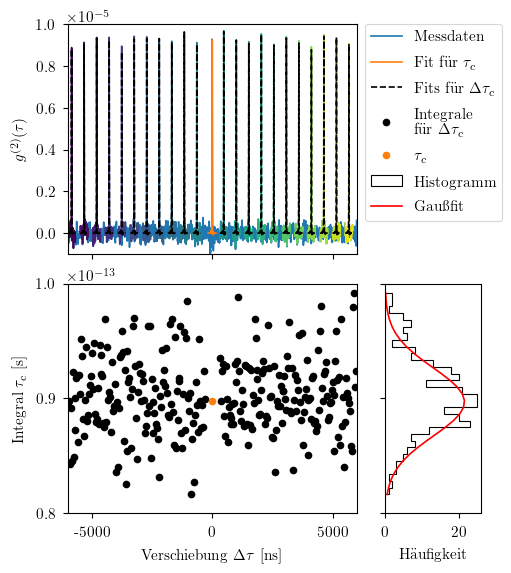

In [12]:
data = Data_reduction('D:/air_10x10', number_data=10000)
data.data_reduction()
infodict = data.integrate(external_plotting=True, return_infodict=True)
t, g2 = data.time_arr, data.av_g2_corr
fig = plt.figure(layout='constrained', figsize=(5,5.62))
axd = fig.subplot_mosaic('aaal;bbbc', gridspec_kw={'wspace':0.0, 'hspace':0.035})
axd['a'].plot(t*1e9, g2, color=cmap[0], label='Messdaten')
axd['a'].plot(np.arange(-160,160), data._fit_func(np.arange(-160,160)*1e-9, *infodict['fit_params']), color=cmap[1], label='Fit für $\\tau_{\mathrm{c}}$')
axd['a'].set( ylabel='$g^{(2)}(\\tau)$', xlim=[-6000,6000], xticks=[-5000,0,5000], xticklabels=[], ylim=[-0.1e-5,1e-5])
axd['a'].plot(data.t_shifted[0]*1e9, data.shifted_fits[0], color='k', linestyle='--', label='Fits für $\\Delta\\tau_{\mathrm{c}}$')
for n in range(len(data.shifted_g2))[::13]:
    axd['a'].plot(data.t_shifted[n]*1e9, data.shifted_g2[n], color=cmap_grad(n/len(data.shifted_g2)))
    axd['a'].plot(data.t_shifted[n]*1e9, data.shifted_fits[n], color='k', linestyle='--')
axd['b'].plot(data.shift_range*1.6, data.err_integrals, 'ok', label='Integrale\n für $\\Delta\\tau_{\mathrm{c}}$')
axd['b'].plot(0, data.integral[0], 'o', color=cmap[1], label='$\\tau_{\mathrm{c}}$')
axd['b'].set(xlabel='Verschiebung $\\Delta\\tau$ [ns]', ylabel='Integral $\\tau_{\mathrm{c}}$ [s]', xticks=[-5000,0,5000], xticklabels=['-5000','0','5000'], xlim=[-6000, 6000], yticks=[0.8e-13,0.9e-13,1e-13], ylim=[0.8e-13,1e-13])

n,b, _ =  axd['c'].hist(data.err_integrals, bins=30, orientation='horizontal', color='k', histtype='step', label='Histogramm')
popt, pcov = curve_fit(gauss, b[:-1], n, p0=[20,0.9e-13, 0.1e-13])
axd['c'].plot(gauss(b, *popt), b, color='red', label='Gaußfit')
axd['c'].set(yticks=[0.8e-13,0.9e-13,1e-13], xlabel='Häufigkeit', ylim=[0.8e-13,1e-13], yticklabels=[])

axd['l'].axis('off')
h1, l1 = axd['a'].get_legend_handles_labels()
h2, l2 = axd['b'].get_legend_handles_labels()
h3, l3 = axd['c'].get_legend_handles_labels()
axd['l'].legend(h1+h2+h3,l1+l2+l3, loc='upper center', borderaxespad=0, labelspacing=0.8)
fig.savefig('latex/images/Analysis/integration_error.pdf', bbox_inches='tight')

#### Shaula datan - Mittelung der Mittleren Pulse und speicher der Daten in einem besseren Format

In [13]:
# #Data:
# shaula = np.loadtxt('shaula_data/Shaula_cumulative.txt')
# t = shaula[:,0]
# aa = shaula[:,1]
# bb = shaula[:,2]
# ab = shaula[:,3]
# ba = shaula[:,4]
# np.savetxt('shaula_data/3Ax4A/data.txt', aa)
# np.savetxt('shaula_data/3Ax4B/data.txt', ab)
# np.savetxt('shaula_data/3Bx4A/data.txt', ba)
# np.savetxt('shaula_data/3Bx4B/data.txt', bb)
# # Calibs:
# # CT3
# p1 = np.loadtxt("E:/Documents/curcor/corr_results/results_HESS/20220419_HESS/calibs_ct3/calib.shape")
# p2 = np.loadtxt("E:/Documents/curcor/corr_results/results_HESS/20220420_HESS/calibs_ct3/calib.shape")
# p3 = np.loadtxt("E:/Documents/curcor/corr_results/results_HESS/20220421_HESS/calibs_ct3/calib.shape")
# ct3 = (p1+p2+p3)/3
# # CT4
# p1 = np.loadtxt("E:/Documents/curcor/corr_results/results_HESS/20220419_HESS/calibs_ct4/calib.shape")
# p2 = np.loadtxt("E:/Documents/curcor/corr_results/results_HESS/20220420_HESS/calibs_ct4/calib.shape")
# p3 = np.loadtxt("E:/Documents/curcor/corr_results/results_HESS/20220421_HESS/calibs_ct4/calib.shape")
# ct4 = (p1+p2+p3)/3

# # Saving... 
# np.savetxt('shaula_data/3Ax4A/ch0/calib.shape1', ct3[:,0:2])
# np.savetxt('shaula_data/3Ax4A/ch1/calib.shape1', ct4[:,0:2])
# np.savetxt('shaula_data/3Ax4B/ch0/calib.shape1', ct3[:,0:2])
# np.savetxt('shaula_data/3Ax4B/ch1/calib.shape1', ct4[:,0:3:2])
# np.savetxt('shaula_data/3Bx4A/ch0/calib.shape1', ct3[:,0:3:2])
# np.savetxt('shaula_data/3Bx4A/ch1/calib.shape1', ct4[:,0:2])
# np.savetxt('shaula_data/3Bx4B/ch0/calib.shape1', ct3[:,0:3:2])
# np.savetxt('shaula_data/3Bx4B/ch1/calib.shape1', ct4[:,0:3:2])

#### Shaula - Integration

c:\Users\steph\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


3Ax4A (10x10) Integral: [2.03606446e-14 1.91767278e-15]
	 Zeitauflösung: 2.5094475842785866e-09 3.181890194077735e-10
3Ax4B (10x40) Integral: [1.67050313e-14 1.66785737e-15]
	 Zeitauflösung: 1.1472096504388122e-09 4.391120453338397e-10
3Bx4A (40x10) Integral: [1.66817223e-14 1.96238302e-15]
	 Zeitauflösung: 1.710407276136124e-09 4.47403546280451e-10
3Bx4B (40x40) Integral: [1.61858647e-14 1.98491371e-15]
	 zeitaf+uflösung: 2.227566572953255e-09 4.674107593226034e-10
------------------------------------------------------------
Weighted mean of time resolution: 2.0082810710476193e-09 2.0147091680733574e-10
------------------------------------------------------------
Integral 10x10/10x40: (1.2188330724078473, 0.1672921710693735) 
Integral 10x10/40x40: (1.2579275121706763, 0.1945099462292821)


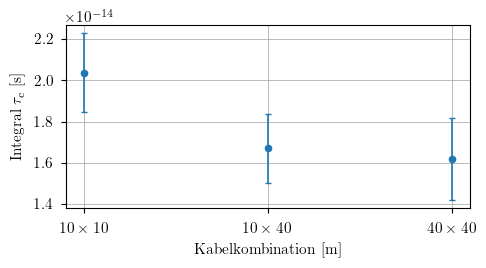

In [14]:
numerator, denominator = 0, 0 # For weighted mean of sigmas

aa = Data_reduction('shaula_data/3Ax4A')
aa.av_g2 = np.loadtxt('shaula_data/3Ax4A/data.txt') # As data is already averaged, set av_g2 directly instead of calling Data_reduction.data_reduction()
infodict = aa.integrate(return_infodict=True)
print('3Ax4A (10x10) Integral:', aa.integral)
print('\t Zeitauflösung:', infodict['fit_params'][-1], infodict['fit_params_error'][-1])
numerator += infodict['fit_params'][-1] / infodict['fit_params_error'][-1]**2
denominator += 1 / infodict['fit_params_error'][-1]**2

ab = Data_reduction('shaula_data/3Ax4B')
ab.av_g2 = np.loadtxt('shaula_data/3Ax4B/data.txt')
infodict = ab.integrate(return_infodict=True)
print('3Ax4B (10x40) Integral:', ab.integral)
print('\t Zeitauflösung:', infodict['fit_params'][-1], infodict['fit_params_error'][-1])
numerator += infodict['fit_params'][-1] / infodict['fit_params_error'][-1]**2
denominator += 1 / infodict['fit_params_error'][-1]**2

ba = Data_reduction('shaula_data/3Bx4A')
ba.av_g2 = np.loadtxt('shaula_data/3Bx4A/data.txt')
infodict = ba.integrate(return_infodict=True)
print('3Bx4A (40x10) Integral:', ba.integral)
print('\t Zeitauflösung:', infodict['fit_params'][-1], infodict['fit_params_error'][-1])
numerator += infodict['fit_params'][-1] / infodict['fit_params_error'][-1]**2
denominator += 1 / infodict['fit_params_error'][-1]**2

bb = Data_reduction('shaula_data/3Bx4B')
bb.av_g2 = np.loadtxt('shaula_data/3Bx4B/data.txt')
infodict = bb.integrate(return_infodict=True)
print('3Bx4B (40x40) Integral:', bb.integral)
print('\t zeitaf+uflösung:', infodict['fit_params'][-1], infodict['fit_params_error'][-1])
numerator += infodict['fit_params'][-1] / infodict['fit_params_error'][-1]**2
denominator += 1 / infodict['fit_params_error'][-1]**2
print('------------------------------------------------------------')
print('Weighted mean of time resolution:', numerator/denominator, 1/np.sqrt(denominator))
print('------------------------------------------------------------')
print('Integral 10x10/10x40:', get_ratio_with_error(aa.integral,ab.integral), '\nIntegral 10x10/40x40:', get_ratio_with_error(aa.integral,bb.integral))
fig,ax = plt.subplots()
ax.errorbar([1,2,3], [aa.integral[0], ab.integral[0], bb.integral[0]], yerr=[aa.integral[1], ab.integral[1], bb.integral[1]], fmt='o')
ax.set(xlabel='Kabelkombination [m]', ylabel='Integral $\\tau_{\mathrm{c}}$ [s]', xticks=[1,2,3], xticklabels=['$10\\times 10$','$10 \\times 40$','$40 \\times 40$'])
ax.grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/shaula_integrals.pdf', bbox_inches='tight')

c:\Users\steph\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Integrale:
 [[2.03606446e-14 1.91767278e-15]
 [1.67050313e-14 1.66785737e-15]
 [1.61858647e-14 1.98491371e-15]]
Zeitauflösungen:
 [[2.50944758e-09 3.18189019e-10]
 [1.14720965e-09 4.39112045e-10]
 [2.22756657e-09 4.67410759e-10]]
Gewichtetes Mittel der Zeitauflösungen: 2.084048087865162e-09 2.2564378028807112e-10
------------------------------------------------------------
Integral 10x10/10x40: (1.2188330724078473, 0.1672921710693735) 
Integral 10x10/40x40: (1.2579275121706763, 0.1945099462292821)


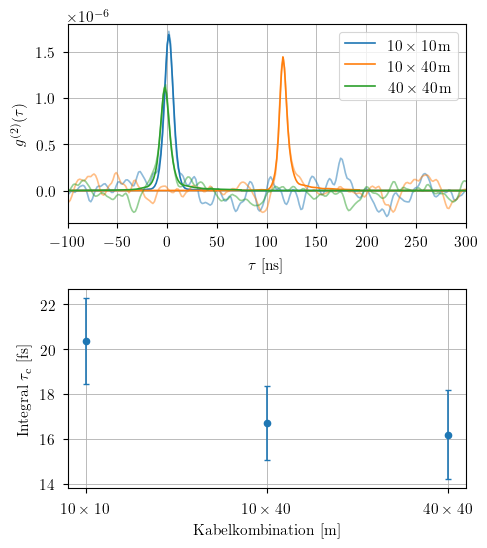

In [32]:
aa = Data_reduction('shaula_data/3Ax4A')
aa.av_g2 = np.loadtxt('shaula_data/3Ax4A/data.txt')
ab = Data_reduction('shaula_data/3Ax4B')
ab.av_g2 = np.loadtxt('shaula_data/3Ax4B/data.txt')
ba = Data_reduction('shaula_data/3Bx4A')
ba.av_g2 = np.loadtxt('shaula_data/3Bx4A/data.txt')
bb = Data_reduction('shaula_data/3Bx4B')
bb.av_g2 = np.loadtxt('shaula_data/3Bx4B/data.txt')
legend_list = ['$10\\times 10\,\mathrm{{m}}$', '$10\\times 40\,\mathrm{{m}}$', '$40\\times 40\,\mathrm{{m}}$']
fig,ax = plt.subplots(nrows=2, figsize=(5,5.62))
integrals = []
sigmas = []
for i,data in enumerate([aa, ab, bb]):
    infodict = data.integrate(return_infodict=True)
    t, g2 = data.time_arr, data.av_g2_corr
    x_fit = np.linspace(-500,500,5000)
    ax[0].plot(t*1e9, g2, color=cmap[i], alpha=0.5)
    ax[0].plot(x_fit, data._fit_func(x_fit*1e-9, *infodict['fit_params']), color=cmap[i], label=f'{legend_list[i]}')
    integrals.append(infodict['integral'])
    sigmas.append([infodict['fit_params'][2], infodict['fit_params_error'][2]]) 
ax[0].set(xlabel='$\\tau$ [ns]', ylabel='$g^{(2)}(\\tau)$', xlim=[-100,300], ylim=[-0.35e-6,1.8e-6])
ax[0].grid()
ax[0].legend()

integrals = np.array(integrals)
sigmas = np.array(sigmas)
ax[1].errorbar([1,2,3], integrals[:,0]*1e15, yerr=integrals[:,1]*1e15, fmt='o', color=cmap[0])
ax[1].set(xlabel='Kabelkombination [m]', ylabel='Integral $\\tau_{\mathrm{c}}$ [fs]', xticks=[1,2,3], xticklabels=['$10\\times 10$','$10 \\times 40$','$40 \\times 40$'])
ax[1].grid()
fig.tight_layout()
fig.savefig('latex/images/Analysis/Shaula_combined.pdf', bbox_inches='tight')
print('Integrale:\n', integrals)
print('Zeitauflösungen:\n', sigmas)
wm, errsum_wm = np.average(sigmas[:,0], weights=1/sigmas[:,1]**2, returned =True)
print('Gewichtetes Mittel der Zeitauflösungen:', wm, 1/np.sqrt(errsum_wm))
print('------------------------------------------------------------')
print('Integral 10x10/10x40:', get_ratio_with_error(aa.integral,ab.integral), '\nIntegral 10x10/40x40:', get_ratio_with_error(aa.integral,bb.integral))

[2.5094475842785866e-09, 1.1472096504388122e-09, 2.227566572953255e-09]